[Run on Colab](https://colab.research.google.com/drive/1wyw6IkKrZYsP0HNA51-d8b9O64Z_k18L?usp=sharing)

In [ ]:
from dcctk.corpusReader import PlainTextReader
from dcctk.concordancer import Concordancer
from dcctk.corpus import TextBasedCorpus

c = Concordancer(PlainTextReader("data").corpus)

## 1 Concordance Search

In [6]:
cql = '''
"君" "子" [ char!="[，。、《》「」『』！？：；]" ]
'''.strip()
results = list(c.cql_search(cql, left=10, right=10))

print('Num of results:', len(results))
for r in results[:5]: print(r)

Num of results: 3570
<Concord 雨，不及地尺而復。」{君子者}、孔子。孔子修之曰：>
<Concord 位，而反乎屠羊之肆。{君子聞}之曰：「甚矣哉！屠羊>
<Concord 或遇以死，或遇以生，{君子避}之，是亦傷人，故吏者>
<Concord 五伯有暴亂之謀。是故{君子不}責備于一人，方正而不>
<Concord 禽何？學者，所以求為{君子也}。求而不得者有矣，夫>


### 1.1 Concord Object

In [7]:
results[0].get_kwic()

('雨，不及地尺而復。」君子者、孔子。孔子修之曰：', (10, 12))

In [8]:
results[0].get_timestep()

1

In [9]:
results[0].get_timestep(lambda x: x['time_range'])

[-205, 220]

In [10]:
results[0].data

{'captureGroups': {},
 'keyword': '君子者',
 'left': '雨，不及地尺而復。」',
 'meta': {'id': '02/論衡_說日.txt',
  'text': {'author': 'Wang Chong', 'book': '論衡', 'sec': '說日'},
  'time': {'label': '漢', 'ord': 2, 'time_range': [-205, 220]}},
 'position': (1, 160, 27, 132),
 'right': '、孔子。孔子修之曰：'}

## 2 Semantic Similarity with AnchiBert

In [11]:
from random import sample, seed
from dcctk.embeddings import AnchiBert
from dcctk.concordSimil import ConcordSimil

# Jupyter settings for interactive visualizations
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(resources=INLINE)


# Initialize bert model
emb = AnchiBert()

# Sample 500 concordance lines of "君子"
seed(100)
results_samp = sample(results, 500)
cs = ConcordSimil(concord_lines=results_samp, bert_model=emb)

Downloading...
From: https://drive.google.com/uc?id=1uMlNJzilEhSigIcfjTjPdYOZL9IQfHNK
To: /content/AnchiBERT.zip
100%|██████████| 382M/382M [00:02<00:00, 140MB/s]


Loading AnchiBERT model from AnchiBERT/ ...


Some weights of the model checkpoint at AnchiBERT/ were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Computing bert embeddings...


  0%|          | 0/500 [00:00<?, ?it/s]

### 2.1 Sorting Concordance Lines based on Bert similarity

In [12]:
compare_base = results_samp[20].get_kwic()
print(compare_base)
cs.semantic_sort(*compare_base, is_traditional=True)[:10]

('絕之？懷惡而討不義，君子不予也。楚公子棄疾帥師', (10, 12))


  0%|          | 0/500 [00:00<?, ?it/s]

[(<Concord 絕之？懷惡而討不義，{君子不}予也。楚公子棄疾帥師>, 1.0000000249452985),
 (<Concord 直而俓，儉而好𠋤者，{君子不}與也。夸而無恥，彊而>, 0.9443227685052723),
 (<Concord ，拂乎正，沈而樂者，{君子不}聽也。」或問：「侍君>, 0.942362932104167),
 (<Concord 庸行翳路，沖沖而活，{君子不}貴也。」楚兩龔之絜，>, 0.9412178065511391),
 (<Concord ，『其身親為不善者，{君子不}入也』。今佛肸親以中>, 0.9233915517589399),
 (<Concord 皆在於凶德，雖得之，{君子不}貴也。君子則不然，言>, 0.9127920194460578),
 (<Concord 。不合乎先王之法者，{君子不}法也。」觀書者譬諸觀>, 0.9127349625150739),
 (<Concord 巧。邪生於多慾。是以{君子不}尚也。禮。與其奢也寧>, 0.9035240450850379),
 (<Concord 中道別去。爵級不進，{君子不}興。既濟：六雁俱飛，>, 0.8991585156332778),
 (<Concord 百姓也。故無功之師，{君子不}行；無用之地，聖王不>, 0.8982093864739673)]

### 2.2 Visualizing Bert embeddings

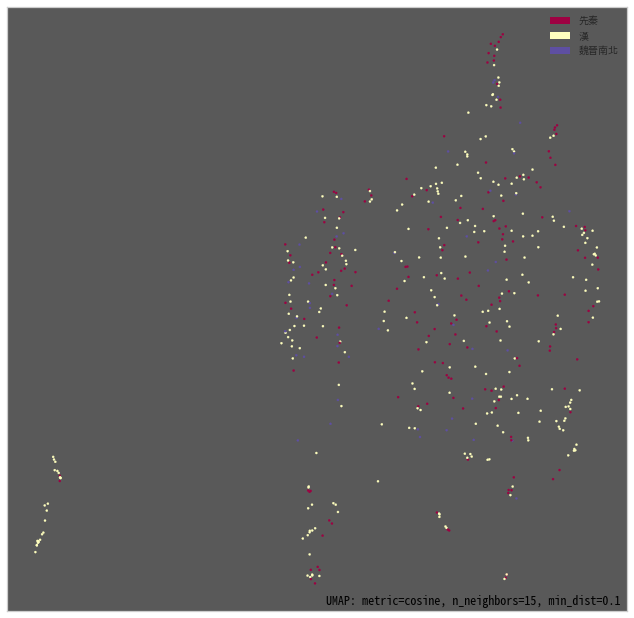

In [35]:
cs.plot_embeddings(labels="m.time.label", interactive=False, background='0.35')

### 2.3 Hierarchical Clustering of Instances

#### 2.3.1 Exploring Optimal Number of Clusters

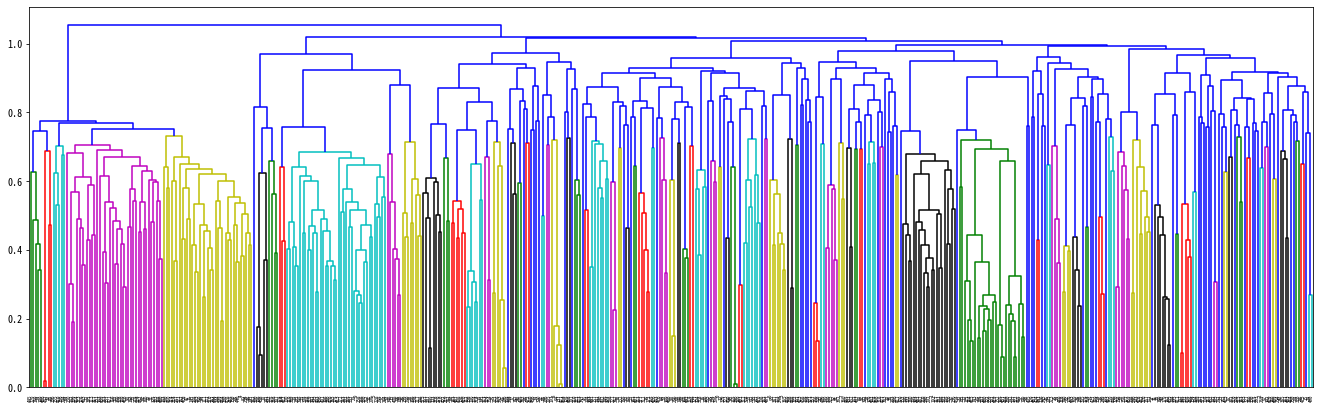

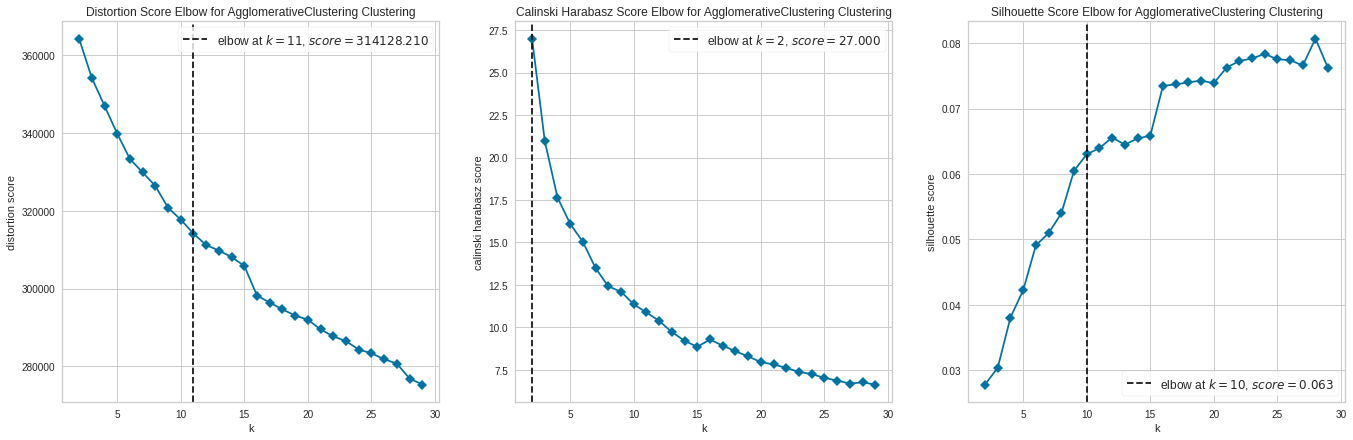

In [15]:
cs.hierarchical_clustering_explore(method='average', metric='cosine', standardize_features=True)

#### 2.3.2 Hierarchical Clustering with average linkage and cosine distance


In [16]:
# cs.hierarchical_clustering(threshold=.8, criterion='distance', visualize=False)
df = cs.hierarchical_clustering(threshold=19, criterion='maxclust', visualize=False)
df

,left,keyword,right,timestep,m.id,m.time.time_range,m.time.label,m.time.ord,m.text.book,m.text.sec,emb_id,m.text.author,cluster
0,能為表者，未之聞也。,君子時,則進，得之以義，何幸,1,02/淮南子_繆稱訓.txt,"-205, 220",漢,2,淮南子,繆稱訓,0,NaN,7
1,行也。山下有雷，頤；,君子以,慎言語，節飲食。觀我,0,01/周易_象傳.txt,"-1000, -206",先秦,1,周易,象傳,1,NaN,12
2,冬至絕事。冬至前後，,君子安,身靜體，百官絕事，不,2,03/後漢書_志.txt,"221, 589",魏晉南北,3,後漢書,志,2,NaN,19
3,德潤身，心廣體胖，故,君子必,誠其意。《詩》云：「,0,01/禮記_大學.txt,"-1000, -206",先秦,1,禮記,大學,3,NaN,8
4,鑿也，不其然乎？是以,君子之,為論也，必原事類之宜,1,02/中論_夭壽.txt,"-205, 220",漢,2,中論,夭壽,4,Xu Gan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,從外來，驕其妻妾。由,君子觀,之，則人之所以求富貴,0,01/孟子_離婁下.txt,"-1000, -206",先秦,1,孟子,離婁下,495,NaN,13
496,者靈以化。於戲允哉！,君子辟,神也，觀彼威儀，遊燕,1,02/說苑_辨物.txt,"-205, 220",漢,2,說苑,辨物,496,Liu Xiang,11
497,婦；君之父母、従母；,君子子,為庶母慈己者。緦麻，,0,01/儀禮_喪服.txt,"-1000, -206",先秦,1,儀禮,喪服,497,NaN,11
498,子論其材曰：『有土之,君子也,，有眾使也，有刑用也,1,02/孔子家語_弟子行.txt,"-205, 220",漢,2,孔子家語,弟子行,498,NaN,4


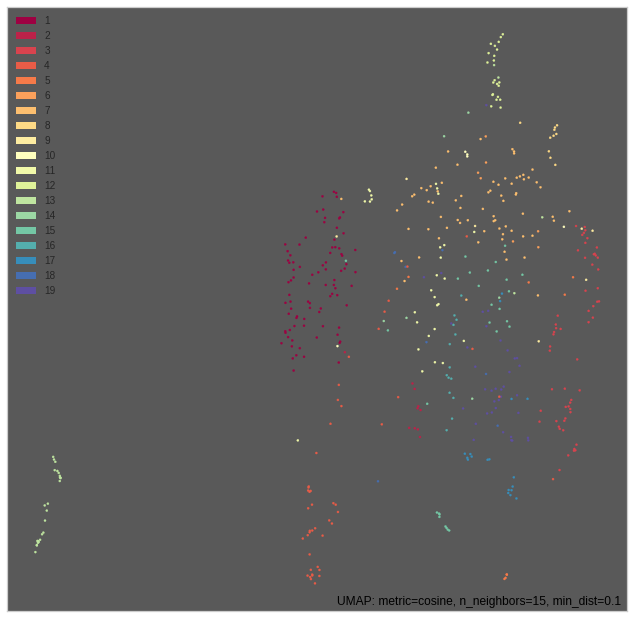

In [19]:
cs.plot_cluster_results(interactive=False, background='0.35')

In [20]:
df_sub = df[df.cluster == 9]
print('num of results:', df_sub.shape[0])
df_sub

num of results: 7


,left,keyword,right,timestep,m.id,m.time.time_range,m.time.label,m.time.ord,m.text.book,m.text.sec,emb_id,m.text.author,cluster
122,死夫。裴回兩渠間兮，,君子獨,安居！」坐者皆泣。有,1,02/漢書_傳.txt,"-205, 220",漢,2,漢書,傳,122,NaN,9
136,，人道福正而禍邪。故,君子內,正而外馴，每以下人。,1,02/太玄經_太玄瑩.txt,"-205, 220",漢,2,太玄經,太玄瑩,136,Yang Xiong,9
264,有喜色。門人曰：「聞,君子禍,至不懼，福至不喜。」,1,02/史記_世家.txt,"-205, 220",漢,2,史記,世家,264,Sima Qian,9
371,田，利見大人。九三：,君子終,日乾乾，夕惕若，厲，,0,01/周易_易經.txt,"-1000, -206",先秦,1,周易,易經,371,NaN,9
391,安，是以嬰得順也。聞,君子獨,立不慚於影。今孔子伐,1,02/孔叢子_詰墨.txt,"-205, 220",漢,2,孔叢子,詰墨,391,NaN,9
423,水而生，失水而死，故,君子常,懼而不敢失道。豪傑秉,1,02/三略_下略.txt,"-205, 220",漢,2,三略,下略,423,NaN,9
458,甘糟糠而安藜藿。「夫,君子非,不欲仕也。恥夸毗以求,2,03/後漢書_列傳.txt,"221, 589",魏晉南北,3,後漢書,列傳,458,NaN,9


## 3 Sense Analysis

In [21]:
from dcctk.senseAnalysis import SenseAnalysis

dsa = SenseAnalysis(cs)

### 3.1 Sense distribution across time

In [22]:
dsa.sense_distribution_raw

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,32,1,19,15,5,2,24,7,1,0,12,12,3,2,10,8,6,2,13
1,40,7,37,25,4,5,42,2,5,4,15,7,26,3,15,3,11,5,21
2,15,2,0,6,0,0,7,1,1,1,2,3,0,1,2,3,1,1,3


In [23]:
dsa.sense_distribution

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.183908,0.005747,0.109195,0.086207,0.028736,0.011494,0.137931,0.040230,0.005747,0.000000,0.068966,0.068966,0.017241,0.011494,0.057471,0.045977,0.034483,0.011494,0.074713
1,0.144404,0.025271,0.133574,0.090253,0.014440,0.018051,0.151625,0.007220,0.018051,0.014440,0.054152,0.025271,0.093863,0.010830,0.054152,0.010830,0.039711,0.018051,0.075812
2,0.306122,0.040816,0.000000,0.122449,0.000000,0.000000,0.142857,0.020408,0.020408,0.020408,0.040816,0.061224,0.000000,0.020408,0.040816,0.061224,0.020408,0.020408,0.061224


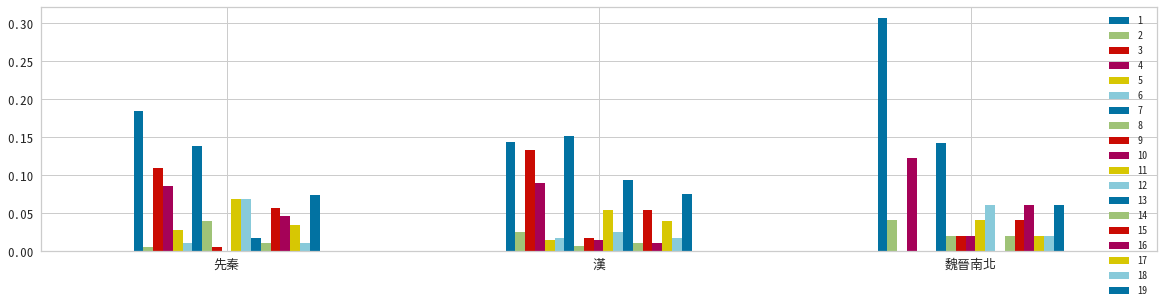

In [37]:
dsa.plot_sense_distribution(timelabel='m.time.label', fontsize=13, figsize=(20,4.5))

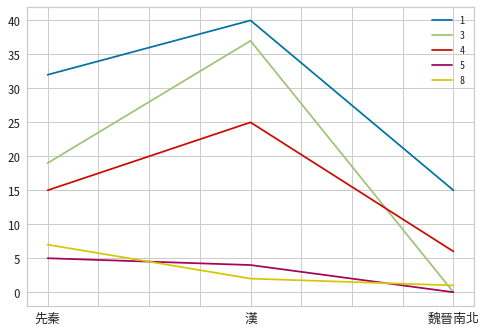

In [36]:
dsa.plot_sense_timeseries(clusters=[1, 3, 4, 5, 8], timelabel='m.time.label', raw_count=True, fontsize=13)

## 4 Dispersion

In [26]:
import pprint
from dcctk.dispersion import Dispersion
from dcctk.corpusReader import PlainTextReader

dp = Dispersion(PlainTextReader("data").corpus)

Indexing corpus for text retrival...


  0%|          | 0/5 [00:00<?, ?it/s]

Indexing corpus for concordance search...


  0%|          | 0/5 [00:00<?, ?it/s]

### 4.1 Dispersion measures of a character

Corpus parts are separated text files.

In [27]:
# Compute on the full corpus
dp.char_dispersion(char='之')

{'DP': 0.2022111504415149,
 'DPnorm': 0.20221136832606973,
 'JuillandD': 0.9852650352870054,
 'KLdivergence': 0.19438300669532335,
 'RosengrenS': 0.9263291584455613,
 'range': 1844}

In [28]:
# Compute separate dispersion measures for each subcorpus (time-sliced)
for i in range(dp.num_of_subcorp):
    stats, data = dp.char_dispersion(char='之', subcorp_idx=i, return_raw=True)
    print(f"Time: {i}")
    print(f"Occured {data['f']} times in {data['n']} texts\n")
    pprint.pprint(stats)
    print('\n')

Time: 0
Occured 64665 times in 732 texts

{'DP': 0.12850786502690828,
 'DPnorm': 0.12850904069194602,
 'JuillandD': 0.9773162825598201,
 'KLdivergence': 0.09589034120820826,
 'RosengrenS': 0.9614052434775078,
 'range': 666}


Time: 1
Occured 100411 times in 1049 texts

{'DP': 0.177157904011686,
 'DPnorm': 0.17715848879560456,
 'JuillandD': 0.9793139748213145,
 'KLdivergence': 0.14783747591652752,
 'RosengrenS': 0.9465804731333193,
 'range': 1021}


Time: 2
Occured 44167 times in 156 texts

{'DP': 0.13409883701225642,
 'DPnorm': 0.13411539941898626,
 'JuillandD': 0.9639771653228966,
 'KLdivergence': 0.0886095001420331,
 'RosengrenS': 0.9702834801523642,
 'range': 156}


Time: 3
Occured 1365 times in 1 texts

{'DP': 0.0,
 'DPnorm': 0,
 'JuillandD': None,
 'KLdivergence': 0.0,
 'RosengrenS': 1.0000000000000002,
 'range': 1}


Time: 4
Occured 0 times in 5 texts

{'DP': 0,
 'DPnorm': 0,
 'JuillandD': None,
 'KLdivergence': 0,
 'RosengrenS': None,
 'range': 0}




### 4.2 Dispersion measures of a complex form

### 4.2.1 CQL Search Result

In [29]:
import pandas as pd
from dcctk.concordancer import Concordancer

c = Concordancer(PlainTextReader("data").corpus)
cql = """
"王" "者"
""".strip()
results = list(c.cql_search(cql, left=10, right=10))

print('Num of results:', len(results))
for r in results[:5]: print(r)

Indexing corpus for text retrival...


  0%|          | 0/5 [00:00<?, ?it/s]

Indexing corpus for concordance search...


  0%|          | 0/5 [00:00<?, ?it/s]

Num of results: 1152
<Concord 寧，明王之憂也。』故{王者}之於天下，猶一室之中>
<Concord 固辭曰：「昔陳嬰不受{王者}，以有老母也。今統內>
<Concord ，臣等誠竊惶懼。臣聞{王者}動設先置，止則交戟，>
<Concord 也。非王者則曷為謂之{王者}？王者無求，曰：是子>
<Concord 此一時也。五百年必有{王者}興，其間必有名世者。>


In [30]:
# Compute separate dispersion measures for each subcorpus (time-sliced)
df = []
for i in range(dp.num_of_subcorp):
    stats, data = dp.pattern_dispersion(data=results, subcorp_idx=i, return_raw=True)
    stats['time'] = i
    stats['freq'] = data['f']
    stats['range (%)'] = stats['range'] / data['n']
    stats['num_of_texts'] = data['n']
    stats['corpus_size'] = data['corpus_size']
    df.append(stats)

pd.DataFrame(df)

,range,DP,DPnorm,KLdivergence,JuillandD,RosengrenS,time,freq,range (%),num_of_texts,corpus_size
0,117,0.730767,0.730774,2.468989,0.865116,0.230688,0,242,0.159836,732,1858228
1,206,0.510130,0.510132,1.693783,0.835961,0.462887,1,775,0.196378,1049,3938310
2,40,0.328366,0.328406,0.682159,0.804040,0.673157,2,135,0.256410,156,2097273
3,0,0.000000,0.000000,0.000000,NaN,NaN,3,0,0.000000,1,458738
4,0,0.000000,0.000000,0.000000,NaN,NaN,4,0,0.000000,5,50


### 4.2.2 Sense Cluster

In [31]:
d = cs.hierarchical_clustering(threshold=19, criterion='maxclust', visualize=False)
d = d[d.cluster == 8]
d

,left,keyword,right,timestep,m.id,m.time.time_range,m.time.label,m.time.ord,m.text.book,m.text.sec,emb_id,m.text.author,cluster
3,德潤身，心廣體胖，故,君子必,誠其意。《詩》云：「,0,01/禮記_大學.txt,"-1000, -206",先秦,1,禮記,大學,3,NaN,8
6,也；見敬愛者，人也。,君子必,在己者，不必在人者也,0,01/呂氏春秋_孝行覽.txt,"-1000, -206",先秦,1,呂氏春秋,孝行覽,6,Lu Bu-wei,8
95,其所貴。」此之謂也。,君子必,辯。凡人莫不好言其所,0,01/荀子_非相.txt,"-1000, -206",先秦,1,荀子,非相,95,NaN,8
173,，知之，正之至也。故,君子必,存乎三至，弗至，斯有,1,02/申鑒_雜言下.txt,"-205, 220",漢,2,申鑒,雜言下,173,NaN,8
248,兆，而成之者無幾。故,君子必,立其志。《易》曰：「,1,02/中論_治學.txt,"-205, 220",漢,2,中論,治學,248,Xu Gan,8
268,必友，為人弟必悌。故,君子莫,若欲為惠君、忠臣、慈,0,01/墨子_卷四.txt,"-1000, -206",先秦,1,墨子,卷四,268,NaN,8
365,好色，此之謂自謙，故,君子必,慎其獨也！小人閑居為,0,01/禮記_大學.txt,"-1000, -206",先秦,1,禮記,大學,365,NaN,8
387,行安之，樂言之；故言,君子必,辯。小辯不如見端，見,0,01/荀子_非相.txt,"-1000, -206",先秦,1,荀子,非相,387,NaN,8
469,楊柳有路側之勢故也。,君子當,去二輕取四重：言重則,2,03/金樓子_立言.txt,"221, 589",魏晉南北,3,金樓子,立言,469,NaN,8
488,民衣食之所以足也。故,君子莫,若審兼而務行之，為人,0,01/墨子_卷四.txt,"-1000, -206",先秦,1,墨子,卷四,488,NaN,8


In [32]:
# Compute separate dispersion measures for each subcorpus (time-sliced)
df = []
for i in range(dp.num_of_subcorp):
    stats, data = dp.pattern_dispersion(data=d, subcorp_idx=i, return_raw=True)
    stats['time'] = c.get_meta(i).get('label', '')
    stats['freq'] = data['f']
    stats['range (%)'] = stats['range'] / data['n']
    stats['num_of_texts'] = data['n']
    stats['corpus_size'] = data['corpus_size']
    df.append(stats)

pd.DataFrame(df)

,range,DP,DPnorm,KLdivergence,JuillandD,RosengrenS,time,freq,range (%),num_of_texts,corpus_size
0,4,0.990412,0.990421,7.100799,4.231818e-01,0.008283,先秦,7,0.005464,732,1858228
1,2,0.998976,0.998980,10.052050,2.409732e-01,0.000983,漢,2,0.001907,1049,3938310
2,1,0.994173,0.994296,7.423009,1.110223e-16,0.005827,魏晉南北,1,0.006410,156,2097273
3,0,0.000000,0.000000,0.000000,NaN,NaN,ASBC,0,0.000000,1,458738
4,0,0.000000,0.000000,0.000000,NaN,NaN,Analyzing Dispersion toy data,0,0.000000,5,50
